In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
from citipy import citipy
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

brae gb
rikitea pf
vaini to
yellowknife ca
hunza pk
hilo us
punta arenas cl
hobart au
wattegama lk
sao filipe cv
carnarvon au
opunake nz
rawson ar
ponta delgada pt
albany au
bredasdorp za
pundaguitan ph
miri my
punta arenas cl
adrar dz
port elizabeth za
airai pw
mount isa au
thinadhoo mv
san francisco ar
lebu cl
nelson bay au
westport ie
ixtapa mx
mukhen ru
vaitupu wf
umm durman sd
saint-philippe re
mar del plata ar
tessalit ml
chuy uy
ushuaia ar
illoqqortoormiut gl
avarua ck
vostok ru
comodoro rivadavia ar
kuvshinovo ru
busselton au
vaini to
kodiak us
vaini to
butaritari ki
albany au
labuhan id
mys shmidta ru
rikitea pf
kapaa us
souillac mu
punta arenas cl
barentsburg sj
ribeira grande pt
ushuaia ar
rikitea pf
ballina ie
necochea ar
vaitupu wf
arlit ne
lodja cd
bengkulu id
mataura pf
barentsburg sj
morros br
maraa br
tuktoyaktuk ca
damaturu ng
pisco pe
puerto ayora ec
vaini to
yar-sale ru
mount gambier au
virginia beach us
mar del plata ar
kandi bj
torbay ca
pevek ru
bathsheba bb
sain

komsomolskiy ru
lagoa pt
rikitea pf
padang id
mataura pf
thompson ca
deputatskiy ru
itarema br
mahebourg mu
harindanga in
chokurdakh ru
port alfred za
hilo us
half moon bay us
klaksvik fo
mount gambier au
haines junction ca
pevek ru
zheleznodorozhnyy ru
castro cl
klaksvik fo
imbituba br
gamba ga
hilo us
naryan-mar ru
mar del plata ar
krasnoznamensk ru
cape town za
chokurdakh ru
yantal ru
husavik is
pevek ru
kenai us
jiayuguan cn
new norfolk au
hollis us
saskylakh ru
khatanga ru
athabasca ca
rikitea pf
port elizabeth za
ushuaia ar
verkhoyansk ru
margate za
tautira pf
ushuaia ar
saint-philippe re
busselton au
ushuaia ar
san cristobal ec
arraial do cabo br
lebu cl
tura ru
ilulissat gl
atuona pf
yellowknife ca
jamestown sh
nikolskoye ru
nikolskoye ru
atuona pf
ushuaia ar
khovu-aksy ru
ushuaia ar
ushuaia ar
barentsburg sj
qaanaaq gl
sayan pe
amapa br
cabo san lucas mx
jamestown sh
santa fe cu
iroquois falls ca
bluff nz
kavaratti in
valparaiso cl
murgab tm
atar mr
butaritari ki
skagastrond i

hermanus za
rikitea pf
richards bay za
doba td
alofi nu
cidreira br
bambous virieux mu
vaitupu wf
yirol sd
satitoa ws
port alfred za
sobolevo ru
qaanaaq gl
mataura pf
tasiilaq gl
ushuaia ar
east london za
bredasdorp za
lebu cl
punta arenas cl
moron mn
busselton au
fortuna us
college us
kapaa us
mar del plata ar
jamestown sh
manokwari id
kodiak us
cabo san lucas mx
provideniya ru
saskylakh ru
dikson ru
praia da vitoria pt
ushuaia ar
bredasdorp za
victoria sc
bredasdorp za


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [7]:
import requests
requests.__version__

'2.25.1'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')# Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | brae
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | hunza
City not found. Skipping...
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | wattegama
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | opunake
Processing Record 13 of Set 1 | rawson
Processing Record 14 of Set 1 | ponta delgada
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | pundaguitan
Processing Record 18 of Set 1 | miri
Processing Record 19 of Set 1 | adrar
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | mount isa
Processing Record 23 of

Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | port-gentil
Processing Record 42 of Set 4 | samarai
Processing Record 43 of Set 4 | nishihara
Processing Record 44 of Set 4 | kruisfontein
Processing Record 45 of Set 4 | mentok
City not found. Skipping...
Processing Record 46 of Set 4 | buritis
Processing Record 47 of Set 4 | padang
Processing Record 48 of Set 4 | inuvik
Processing Record 49 of Set 4 | charters towers
Processing Record 50 of Set 4 | pringsewu
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | ostersund
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | metu
Processing Record 5 of Set 5 | provideniya
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | sur
Processing Record 8 of Set 5 | moerai
Processing Record 9 of Set 5 | poya
Processing Record 10 of Set 5 | marathon
Processing Record 11 of Set 5 | solovetskiy
City not found. Skipping...
Processing 

Processing Record 25 of Set 8 | bundi
Processing Record 26 of Set 8 | simplicio mendes
Processing Record 27 of Set 8 | innisfail
Processing Record 28 of Set 8 | upernavik
Processing Record 29 of Set 8 | suntar
Processing Record 30 of Set 8 | san patricio
Processing Record 31 of Set 8 | kashi
Processing Record 32 of Set 8 | komsomolskiy
Processing Record 33 of Set 8 | itarema
Processing Record 34 of Set 8 | harindanga
Processing Record 35 of Set 8 | half moon bay
Processing Record 36 of Set 8 | klaksvik
Processing Record 37 of Set 8 | haines junction
Processing Record 38 of Set 8 | zheleznodorozhnyy
Processing Record 39 of Set 8 | imbituba
Processing Record 40 of Set 8 | naryan-mar
Processing Record 41 of Set 8 | krasnoznamensk
Processing Record 42 of Set 8 | yantal
Processing Record 43 of Set 8 | husavik
Processing Record 44 of Set 8 | kenai
Processing Record 45 of Set 8 | jiayuguan
Processing Record 46 of Set 8 | hollis
Processing Record 47 of Set 8 | athabasca
Processing Record 48 of

Processing Record 13 of Set 12 | basoko
Processing Record 14 of Set 12 | bokspits
City not found. Skipping...
Processing Record 15 of Set 12 | kurumkan
Processing Record 16 of Set 12 | chernyshevskiy
Processing Record 17 of Set 12 | mbaiki
Processing Record 18 of Set 12 | buon me thuot
City not found. Skipping...
Processing Record 19 of Set 12 | mragowo
Processing Record 20 of Set 12 | kahului
Processing Record 21 of Set 12 | homer
Processing Record 22 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 23 of Set 12 | cache creek
Processing Record 24 of Set 12 | henties bay
Processing Record 25 of Set 12 | abalak
Processing Record 26 of Set 12 | cao bang
Processing Record 27 of Set 12 | liverpool
Processing Record 28 of Set 12 | tonantins
Processing Record 29 of Set 12 | laredo
Processing Record 30 of Set 12 | leningradskiy
Processing Record 31 of Set 12 | stettler
Processing Record 32 of Set 12 | bontang
Processing Record 33 of Set 12 | rincon
Processing Record 34 of Set 12 | jyva

In [17]:
len(city_data)

585

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Brae,60.3964,-1.3530,53.51,83,100,11.03,GB,2021-07-22 09:11:03
1,Rikitea,-23.1203,-134.9692,72.14,71,0,14.97,PF,2021-07-22 09:11:03
2,Vaini,-21.2000,-175.2000,73.56,88,20,4.61,TO,2021-07-22 09:11:04
3,Yellowknife,62.4560,-114.3525,61.29,93,73,5.01,CA,2021-07-22 09:11:04
4,Hilo,19.7297,-155.0900,75.27,90,90,3.44,US,2021-07-22 09:10:30
5,Punta Arenas,-53.1500,-70.9167,39.31,93,75,10.36,CL,2021-07-22 09:11:05
6,Hobart,-42.8794,147.3294,51.06,71,75,10.36,AU,2021-07-22 09:09:09
7,Wattegama,6.7989,81.4808,92.43,40,100,14.43,LK,2021-07-22 09:11:05
8,Sao Filipe,14.8961,-24.4956,76.19,85,13,6.11,CV,2021-07-22 09:11:06
9,Carnarvon,-24.8667,113.6333,67.37,55,0,11.14,AU,2021-07-22 09:06:38


In [19]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [20]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Brae,GB,2021-07-22 09:11:03,60.3964,-1.3530,53.51,83,100,11.03
1,Rikitea,PF,2021-07-22 09:11:03,-23.1203,-134.9692,72.14,71,0,14.97
2,Vaini,TO,2021-07-22 09:11:04,-21.2000,-175.2000,73.56,88,20,4.61
3,Yellowknife,CA,2021-07-22 09:11:04,62.4560,-114.3525,61.29,93,73,5.01
4,Hilo,US,2021-07-22 09:10:30,19.7297,-155.0900,75.27,90,90,3.44
...,...,...,...,...,...,...,...,...,...
580,Doba,TD,2021-07-22 09:15:06,8.6500,16.8500,80.71,69,100,3.51
581,Sobolevo,RU,2021-07-22 09:15:06,54.4299,31.8996,67.17,40,1,11.88
582,Moron,AR,2021-07-22 09:15:07,-34.6534,-58.6198,52.99,82,24,4.81
583,College,US,2021-07-22 09:11:11,64.8569,-147.8028,67.98,55,75,4.61


In [21]:
# Create the output file (CSV).
output_data_file = "..\World_Weather_Analysis\weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

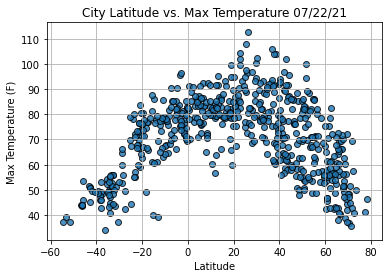

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

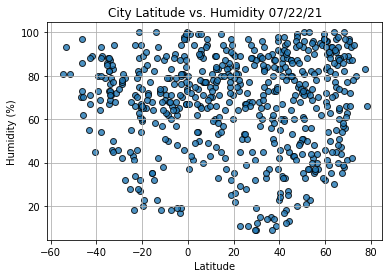

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

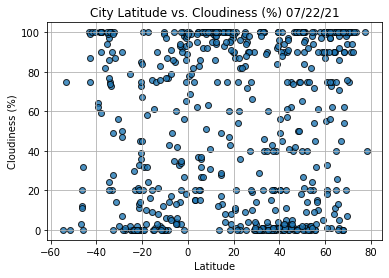

In [26]:
 # Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

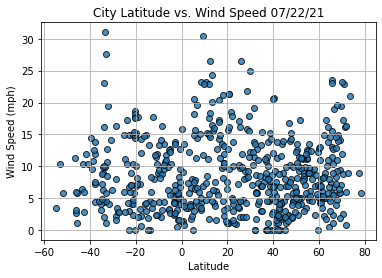

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()